In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


In [2]:
#!pip install --upgrade scikit-learn
#print(sklearn.__version__)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from bokeh.palettes import magma
from bokeh.plotting import figure,show
import gdown
import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Importing Data

In [4]:
#importing the dataset from drive
gdown.download_folder('https://drive.google.com/drive/folders/1Y_kcSpGFC8c6TlB0uKr41ftY9nZBUeKT?', quiet=True)

['/content/Crop Prediction/Dataset/Crop_recommendation.csv']

In [5]:
#importing the dataset
crop = pd.read_csv('/content/Crop Prediction/Dataset/Crop_recommendation.csv')

In [6]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


###**Exploratory Data Analysis**

In [8]:
crop.size

17600

In [9]:
crop.shape

(2200, 8)

In [10]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
crop.info() #the description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
crop = crop.fillna(0) #Replace the missing values with 0
print(crop)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [14]:
crop.duplicated().sum()

0

In [15]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [16]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

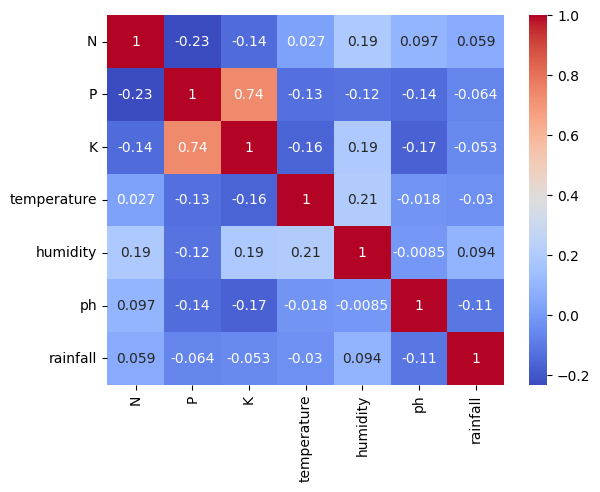

In [17]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [18]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [19]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [20]:
crop['N'].value_counts()

22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: N, Length: 137, dtype: int64

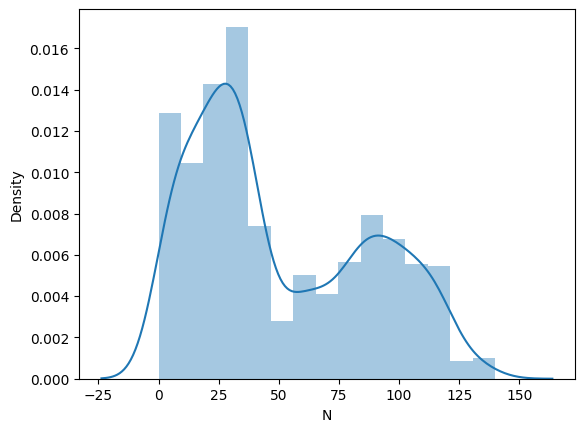

In [21]:
sns.distplot(crop['N'])
plt.show()

In [22]:
crop['humidity'].value_counts()

82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: humidity, Length: 2200, dtype: int64

In [23]:
#the dropping of the V5 columns and store it in y variable
#X = ccd.drop('humidity', axis=1)
#y = ccd[['humidity']]
#the showing of the distribution plot
#sns.distplot(y['humidity'])

<Axes: xlabel='humidity', ylabel='Density'>

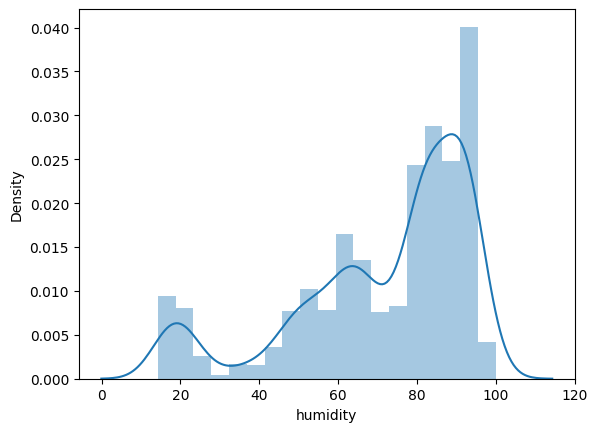

In [24]:
#the showing of the distribution plot
sns.distplot(crop['humidity'])

In [25]:
crop.groupby('humidity').mean()

,N,P,K,temperature,ph,rainfall
humidity,,,,,,
14.258040,28.0,76.0,82.0,20.566019,6.654425,83.759371
14.273280,35.0,64.0,78.0,17.928459,7.496645,85.373788
14.280419,42.0,74.0,83.0,19.258256,7.545258,65.780420
14.323138,31.0,70.0,77.0,20.888187,6.492546,90.462283
14.338474,48.0,65.0,78.0,17.437327,7.861128,73.092670
...,...,...,...,...,...,...
99.658092,19.0,15.0,34.0,26.296449,5.685889,215.919505
99.724010,21.0,20.0,31.0,25.600337,5.855458,165.824873
99.846716,3.0,9.0,35.0,26.916419,6.318553,225.632366


Text(0, 0.5, 'temperature')

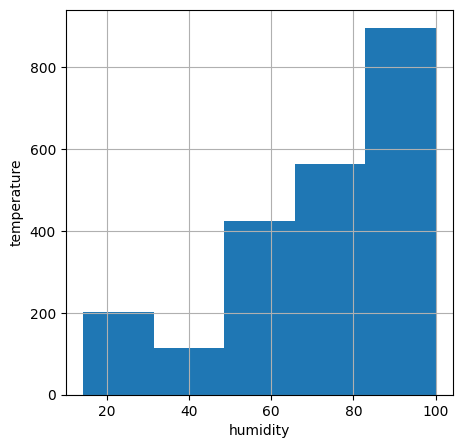

In [26]:
#The histogram plot
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
fig = crop.humidity.hist(bins=5)
fig.set_xlabel('humidity')
fig.set_ylabel('temperature')

# Encoding

In [27]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [28]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [29]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [30]:
#selection of target columns
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [31]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [32]:
X.shape

(2200, 7)

In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [34]:
y.shape

(2200,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

# Split the data into training, validation, and testing sets
# Split the data into training (70%) and temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary data into testing (20%) and validation (10%)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

# Print the shapes of the resulting sets
print("X shape:",X.shape)
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)

print("y shape:",y.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)
print("y_test shape:", y_test.shape)

X shape: (2200, 7)
X_train shape: (1540, 7)
X_validation shape: (220, 7)
X_test shape: (440, 7)
y shape: (2200,)
y_train shape: (1540,)
y_validation shape: (220,)
y_test shape: (440,)


In [36]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)
X_validation = ms.fit_transform(X_validation)

In [39]:
X_train

array([[0.15      , 0.15      , 0.11      , ..., 0.38971557, 0.34132491,
        0.27135565],
       [0.20714286, 0.21428571, 0.115     , ..., 0.45813084, 0.53848884,
        0.25177055],
       [0.42857143, 0.27857143, 0.09      , ..., 0.65071988, 0.34490059,
        0.20261886],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [40]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()


# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [41]:
#X_train

# Training Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),

}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9227272727272727
Naive Bayes  with accuracy : 0.9931818181818182
Support Vector Machine  with accuracy : 0.975
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9613636363636363
Random Forest  with accuracy : 0.9886363636363636
Bagging  with accuracy : 0.9863636363636363
AdaBoost  with accuracy : 0.20454545454545456
Gradient Boosting  with accuracy : 0.975
Extra Trees  with accuracy : 0.8409090909090909


**Logistic Regression**

In [43]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train,y_train)
ypred = LogisticRegression.predict(X_test)
print(f"Logistic Regression accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))

Logistic Regression accuracy on test data : 0.9227272727272727
              precision    recall  f1-score   support

           1       0.73      1.00      0.84        19
           2       1.00      0.94      0.97        17
           3       0.94      0.70      0.80        23
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00        20
           6       1.00      0.74      0.85        27
           7       0.88      1.00      0.94        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       0.69      1.00      0.82        20
          13       1.00      1.00      1.00        18
          14       1.00      0.93      0.96        27
          15       0.81      1.00      0.90        13
          16       0.81      0.89      0.85        19
          17      

In [44]:
Xtrain_pred = LogisticRegression.predict(X_train)
print(f"Logistic Regression accuracy on training data : {accuracy_score(y_train,Xtrain_pred)}")
print(classification_report(y_train,Xtrain_pred))

Logistic Regression accuracy on training data : 0.9428571428571428
              precision    recall  f1-score   support

           1       0.71      0.99      0.83        72
           2       1.00      0.95      0.97        74
           3       0.98      0.64      0.77        66
           4       0.95      1.00      0.97        72
           5       0.97      1.00      0.99        67
           6       1.00      0.81      0.89        63
           7       0.97      0.97      0.97        75
           8       1.00      1.00      1.00        66
           9       0.94      1.00      0.97        76
          10       1.00      0.96      0.98        77
          11       1.00      1.00      1.00        77
          12       0.85      1.00      0.92        68
          13       1.00      1.00      1.00        74
          14       1.00      0.97      0.98        62
          15       0.89      0.94      0.91        78
          16       0.86      0.92      0.89        74
          17  

In [45]:
Xval_pred = LogisticRegression.predict(X_validation)
print(f"Logistic Regression accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

Logistic Regression accuracy on validation data : 0.9181818181818182
              precision    recall  f1-score   support

           1       0.43      1.00      0.60         9
           2       1.00      0.89      0.94         9
           3       1.00      0.18      0.31        11
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        13
           6       1.00      0.70      0.82        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       0.86      1.00      0.92        12
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        11
          15       0.82      1.00      0.90         9
          16       1.00      0.71      0.83         7
          17

In [46]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogisticRegression, X, y,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

**Gaussian Naive Bayes**

In [47]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
ypred = NaiveBayes.predict(X_test)
print(f"Naive Bayes accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))

Naive Bayes accuracy on test data : 0.9931818181818182
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
           2       1.00      1.00      1.00        17
           3       0.88      1.00      0.94        23
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        19
          17       1.00   

In [48]:
Xtrain_pred = NaiveBayes.predict(X_train)
print(f"Naive Bayes accuracy on training data : {accuracy_score(y_train,Xtrain_pred)}")
print(classification_report(y_train,Xtrain_pred))

Naive Bayes accuracy on training data : 0.9954545454545455
              precision    recall  f1-score   support

           1       0.97      0.94      0.96        72
           2       1.00      0.99      0.99        74
           3       0.94      0.97      0.96        66
           4       0.99      1.00      0.99        72
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        74
          17       1.0

In [49]:
Xval_pred = NaiveBayes.predict(X_validation)
print(f"Naive Bayes accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

Naive Bayes accuracy on validation data : 0.9863636363636363
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        10
           5       0.87      1.00      0.93        13
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         8
          14       1.00      0.82      0.90        11
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         7
          17       1

In [50]:
# Cross validation score (Naive Bayes)
score = cross_val_score(NaiveBayes, X, y,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

**Support Vector Machine**

In [51]:
SVM = SVC()
SVM.fit(X_train,y_train)
ypred = SVM.predict(X_test)
print(f"Support Vector Machine accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))

Support Vector Machine accuracy on test data : 0.975
              precision    recall  f1-score   support

           1       1.00      0.68      0.81        19
           2       1.00      0.94      0.97        17
           3       0.79      1.00      0.88        23
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       0.81      1.00      0.90        13
          16       1.00      0.89      0.94        19
          17       1.00     

In [52]:
Xpred = SVM.predict(X_train)
print(f"Support Vector Machine accuracy on training data : {accuracy_score(y_train,Xpred)}")
print(classification_report(y_train,Xpred))

Support Vector Machine accuracy on training data : 0.9857142857142858
              precision    recall  f1-score   support

           1       0.98      0.83      0.90        72
           2       1.00      0.97      0.99        74
           3       0.83      0.98      0.90        66
           4       0.97      1.00      0.99        72
           5       1.00      1.00      1.00        67
           6       1.00      0.98      0.99        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       0.99      1.00      0.99        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       0.95      0.99      0.97        78
          16       0.99      0.97      0.98        74
          1

In [53]:
Xval_pred = SVM.predict(X_validation)
print(f"Support Vector Machine accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

Support Vector Machine accuracy on validation data : 0.95
              precision    recall  f1-score   support

           1       0.56      1.00      0.72         9
           2       1.00      0.89      0.94         9
           3       1.00      0.55      0.71        11
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        13
           6       1.00      0.80      0.89        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        11
          15       0.90      1.00      0.95         9
          16       0.88      1.00      0.93         7
          17       1.00

In [54]:
# Cross validation score (SVM)
score = cross_val_score(SVM, X, y,cv=5)
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

**K-nearest Neighbor**

In [55]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
ypred = KNN.predict(X_test)
print(f"K-Nearest Neighbor accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))

K-Nearest Neighbor accuracy on test data : 0.9704545454545455
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       1.00      0.82      0.90        17
           3       0.82      1.00      0.90        23
           4       0.86      1.00      0.92        18
           5       1.00      1.00      1.00        20
           6       1.00      0.96      0.98        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       0.87      1.00      0.93        13
          16       0.90      0.95      0.92        19
          17       

In [56]:
Xpred = KNN.predict(X_train)
print(f" K-Nearest Neighbor accuracy on training data : {accuracy_score(y_train,Xpred)}")
print(classification_report(y_train,Xpred))

 K-Nearest Neighbor accuracy on training data : 0.9889610389610389
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        72
           2       1.00      0.97      0.99        74
           3       0.86      1.00      0.92        66
           4       0.97      1.00      0.99        72
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       0.99      1.00      0.99        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       0.99      0.97      0.98        78
          16       0.97      1.00      0.99        74
          17  

In [57]:
Xval_pred = KNN.predict(X_validation)
print(f"K-Nearest Neighbor accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

K-Nearest Neighbor accuracy on validation data : 0.9363636363636364
              precision    recall  f1-score   support

           1       0.53      0.89      0.67         9
           2       1.00      1.00      1.00         9
           3       0.71      0.45      0.56        11
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        13
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        11
          15       0.75      1.00      0.86         9
          16       0.86      0.86      0.86         7
          17 

In [58]:
# Cross validation score (KNN)
score = cross_val_score(KNN, X, y,cv=5)
score

array([0.97272727, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

**Decision Tree Classifier**

In [59]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)
ypred = DecisionTree.predict(X_test)
print(f"Decision Tree accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))


Decision Tree accuracy on test data : 0.9636363636363636
              precision    recall  f1-score   support

           1       0.78      0.74      0.76        19
           2       0.80      0.94      0.86        17
           3       0.86      0.78      0.82        23
           4       0.86      1.00      0.92        18
           5       1.00      1.00      1.00        20
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        13
          16       0.95      1.00      0.97        19
          17       1.00 

In [60]:
Xpred = DecisionTree.predict(X_train)
print(f"Decision Tree accuracy on training data : {accuracy_score(y_train,Xpred)}")
print(classification_report(y_train,Xpred))

Decision Tree accuracy on training data : 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        74
          17       1.00      1.00  

In [61]:
Xval_pred = DecisionTree.predict(X_validation)
print(f"Decision Tree accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

Decision Tree accuracy on validation data : 0.9045454545454545
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         9
           2       0.78      0.78      0.78         9
           3       0.67      0.55      0.60        11
           4       1.00      1.00      1.00        10
           5       0.72      1.00      0.84        13
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      0.38      0.55         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         8
          14       0.67      0.55      0.60        11
          15       0.90      1.00      0.95         9
          16       1.00      0.86      0.92         7
          17      

In [62]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.99318182, 0.98409091, 0.99090909, 0.99090909, 0.98636364])

**Random Forest**

In [63]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)
ypred = RandomForest.predict(X_test)
print(f"Random Forest accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))



Random Forest accuracy on test data : 0.990909090909091
              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       1.00      1.00      1.00        17
           3       0.85      1.00      0.92        23
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        19
          17       1.00  

In [64]:
Xpred = RandomForest.predict(X_train)
print(f"Random Forest accuracy on training data : {accuracy_score(y_train,Xpred)}")
print(classification_report(y_train,Xpred))

Random Forest accuracy on training data : 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        74
          17       1.00      1.00  

In [65]:
Xval_pred = RandomForest.predict(X_validation)
print(f"Randon Forest accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

Randon Forest accuracy on validation data : 0.9772727272727273
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         9
           2       1.00      1.00      1.00         9
           3       1.00      0.55      0.71        11
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         7
          17      

In [66]:
# Cross validation score (Random Forest)
score = cross_val_score(RandomForest, X, y,cv=5)
score

array([0.99545455, 0.99318182, 0.99545455, 0.99545455, 0.98863636])

**Gradient Boosting Classifier**

In [67]:
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(X_train,y_train)
ypred = GradientBoosting.predict(X_test)
print(f"Gradient boosting Classifier accuracy on test data : {accuracy_score(y_test,ypred)}")
print(classification_report(y_test,ypred))


Gradient boosting Classifier accuracy on test data : 0.975
              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       1.00      0.88      0.94        17
           3       0.85      0.96      0.90        23
           4       0.90      1.00      0.95        18
           5       1.00      0.95      0.97        20
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       0.95      1.00      0.98        20
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        19
          17       1.0

In [68]:

Xpred = GradientBoosting.predict(X_train)
print(f"Gradient Boosting accuracy on training data : {accuracy_score(y_train,Xpred)}")
print(classification_report(y_train,Xpred))

Gradient Boosting accuracy on training data : 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        74
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        75
           8       1.00      1.00      1.00        66
           9       1.00      1.00      1.00        76
          10       1.00      1.00      1.00        77
          11       1.00      1.00      1.00        77
          12       1.00      1.00      1.00        68
          13       1.00      1.00      1.00        74
          14       1.00      1.00      1.00        62
          15       1.00      1.00      1.00        78
          16       1.00      1.00      1.00        74
          17       1.00      1.

In [69]:
Xval_pred = GradientBoosting.predict(X_validation)
print(f"GradientBoosting accuracy on validation data : {accuracy_score(y_validation,Xval_pred)}")
print(classification_report(y_validation,Xval_pred))

GradientBoosting accuracy on validation data : 0.9181818181818182
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         9
           2       1.00      0.89      0.94         9
           3       1.00      0.45      0.62        11
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        10
           7       0.77      1.00      0.87        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2
          10       1.00      0.88      0.93         8
          11       1.00      1.00      1.00         8
          12       1.00      0.92      0.96        12
          13       1.00      1.00      1.00         8
          14       0.92      1.00      0.96        11
          15       0.88      0.78      0.82         9
          16       0.70      1.00      0.82         7
          17   

In [70]:
# Cross validation score (Gradient Boosting Classifier)
score = cross_val_score(GradientBoosting, X, y,cv=5)
score

array([0.99090909, 0.98863636, 0.99318182, 0.99545455, 0.98636364])

In [71]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.990909090909091

# Predictive System

In [72]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    transformed_features = ms.fit_transform(features)
    #transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [73]:
N = 20
P = 70
k = 40
temperature = 40.0
humidity = 100
ph = 6
rainfall = 10

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Muskmelon is a best crop to be cultivated 


In [74]:
import pickle

# Save models and scalers using pickle
pickle.dump(rfc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))
#pickle.dump(sc, open('standscaler.pkl', 'wb'))